In [8]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600~/.kaggle/kaggle.json

chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [12]:
! kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 26.2MB/s]


In [13]:
! unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Data cleasing

In [14]:
import pandas as pd
# Set the chunk size
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
# check outliars
#print(train['SibSp'].value_counts())
#print(train['Parch'].value_counts())
#print(train['Fare'].value_counts())
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [16]:
import numpy as np
train['Cabin'] = train['Cabin'].notna()*1

In [17]:
# check NaN
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare       Cabin  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.228956  
std      0.806057   49.693429    0.420397  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    0.000000  
max      6.000000  512.329200    1.000000

In [18]:
# fillna
import statistics
from statistics import mode
values = {"Age": round(train['Age'].sum()/len(train['Age']),1), "Embarked": mode(train['Embarked'])}
train = train.fillna(value=values)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [19]:
#create dummy
dummies = pd.get_dummies(train[['Sex','Embarked','Survived','Cabin']], drop_first = True)
train = train.drop(columns=['PassengerId','Name','Ticket','Cabin','Sex','Embarked','Survived'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train) 
train_sc = scaler.transform(train)
train_sc = pd.DataFrame(train_sc, columns= train.columns)
print(train_sc.info())

train = pd.concat([train_sc, dummies], axis = 1)
#train['Sex'][train['Sex'] == 'male'] = 1
#train['Sex'][train['Sex'] == 'female'] = 0
#train['Embarked'][train['Embarked'] == 'S'] = 0
#train['Embarked'][train['Embarked'] == 'C'] = 1
#train['Embarked'][train['Embarked'] == 'Q'] = 2
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    float64
 3   Parch   891 non-null    float64
 4   Fare    891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB
None


Pclass       Age     SibSp     Parch      Fare  Survived  Cabin  \
0  0.827377 -0.494258  0.432793 -0.473674 -0.502445         0      0   
1 -1.566107  0.717299  0.432793 -0.473674  0.786845         1      1   
2  0.827377 -0.191368 -0.474545 -0.473674 -0.488854         1      0   
3 -1.566107  0.490132  0.432793 -0.473674  0.420730         1      1   
4  0.827377  0.490132 -0.474545 -0.473674 -0.486337         0      0   

   Sex_male  Embarked_Q  Embarked_S  
0         1           0           1  
1         0           0           0  
2         0           0           1  
3         0           0           1  
4         1           0           1

In [20]:
train_sc.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Survived    891 non-null    int64  
 6   Cabin       891 non-null    int64  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 51.5 KB


In [21]:
# test data
test = pd.read_csv('test.csv')
PID = test['PassengerId']
test['Cabin'] = test['Cabin'].notna()*1
#test = test.drop(columns=['Cabin','Name','Ticket'])
values = {"Age": round(test['Age'].sum()/len(test['Age']),1), "Fare": round(test['Fare'].sum()/len(test['Fare']),4)}
test = test.fillna(value=values)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [22]:
dummies = pd.get_dummies(test[['Sex','Embarked','Cabin']], drop_first = True)
test = test.drop(columns=['PassengerId','Name','Ticket','Cabin','Sex','Embarked'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(test) 
test_sc = scaler.transform(test)
test_sc = pd.DataFrame(test_sc, columns= test.columns)


test = pd.concat([test_sc, dummies], axis = 1)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    float64
 3   Parch       418 non-null    float64
 4   Fare        418 non-null    float64
 5   Cabin       418 non-null    int64  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(5), int64(1), uint8(3)
memory usage: 20.9 KB
None


In [23]:
test.head()

Pclass       Age     SibSp     Parch      Fare  Cabin  Sex_male  \
0  0.873482  0.428690 -0.499470 -0.400248 -0.498403      0         1   
1  0.873482  1.399817  0.616992 -0.400248 -0.513271      0         0   
2 -0.315819  2.565170 -0.499470 -0.400248 -0.465085      0         1   
3  0.873482 -0.153986 -0.499470 -0.400248 -0.483463      0         1   
4  0.873482 -0.542437  0.616992  0.619896 -0.418468      0         0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1

# OLS
run the OLS model where we can only have numerical variables so that we sue dummy to revise our dataset.

In [24]:
x_train = train.drop(columns= 'Survived')
y_train = train['Survived']

In [25]:
import numpy as np
np.asarray(y_train)
x_train.head()
print(y_train.value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
x_train_ols = x_train
model = sm.OLS(y_train, x_train_ols).fit()
# Check regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              85.94
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                   2.86e-114
Time:                        17:11:49   Log-Likelihood:                         -557.20
No. Observations:                 891   AIC:                                      1132.
Df Residuals:                     882   BIC:                                      1176.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0837      0.025     -3.336      0.001      -0.133      -0.034
Age           -0.1000      0.017     -5.956      0.000      -0.133      -0.067
SibSp         -0.0597      0.017     -3.458      0.001      -0.094      -0.026
Parch          0.0068      0.018      0.391      0.696      -0.028       0.041
Fare           0.0478      0.020      2.442      0.015       0.009       0.086
Cabin          0.3898      0.051      7.680      0.000       0.290       0.489
Sex_male      -0.2389      0.030     -8.050      0.000      -0.297      -0.181
Embarked_Q     0.5477      0.057      9.682      0.000       0.437       0.659
Embarked_S     0.4354      0.028     15.333      0.000       0.380       0.491
==============================================================================
Omnibus:                       32.723   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.995
Skew:                           0.438   Prob(JB):                     6.84e-08
Kurtosis:                       2.653   Cond. No.                         5.53
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
len(x_train)

891

In [28]:
# Check the residual
ypred = model.predict(x_train_ols)
plt.scatter(range(len(x_train_ols)), y_train-ypred)
plt.show()

# Classification
### - Logistic regression, linear discriminant analysis (LDA), and quadratic discriminant analysis (QDA)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
Train, Test = train_test_split(train, test_size=0.25, random_state=1)

In [30]:
X_train_gls = Train.drop(['Survived'], axis=1)
y_train_gls = Train['Survived']
X_test_gls = Test.drop(['Survived'], axis=1)
y_test_gls = Test['Survived']

In [31]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_model.fit(X_train_gls, y_train_gls)
y_pred_logistic = logistic_model.predict(X_test_gls)

In [32]:
confusion_matrix(y_test_gls, y_pred_logistic)

array([[111,  17],
       [ 26,  69]])

We don't get a single positive one right -- so not great performance. Of course, we could choose a different cutoff. Let's evaluate the AUC, where we first have to convert the predictions to probabilities:

In [33]:
y_pred_logistic = logistic_model.predict_proba(X_test_gls)
def Extract(lst): 
    return [item[0] for item in lst]
y_pred_logistic = Extract(y_pred_logistic)

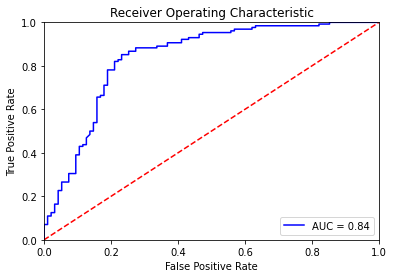

In [34]:
fpr, tpr, threshold = roc_curve((Test['Survived'] == 0), y_pred_logistic) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

Let's check LDA:

In [35]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_gls,y_train_gls)
y_pred_LDA = LDA_model.predict(X_test_gls)
np.sum(y_pred_LDA == 1)

88

In [36]:
confusion_matrix(y_test_gls, y_pred_LDA)

array([[109,  19],
       [ 26,  69]])

In [37]:
y_pred_LDA = LDA_model.predict_proba(X_test_gls) 
y_pred_LDA = Extract(y_pred_LDA)
fpr, tpr, threshold = roc_curve((Test['Survived'] == 0), y_pred_LDA) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

In [38]:
model_class_ens = [(1-x) + (1-y) for x, y in zip(y_pred_LDA, y_pred_logistic)]

No improvement in LDA model. Let's do a average of these two model.

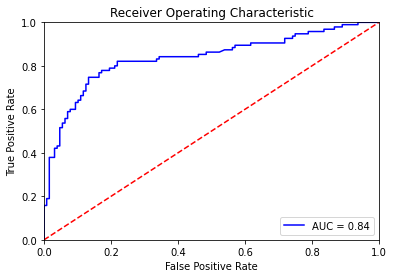

In [39]:
fpr, tpr, threshold = roc_curve((Test['Survived'] == 1), model_class_ens) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

# Regularized Regression 
##### - Ridge Regression, Lasso Regression, and Elastic Net Regression.

## LASSO logistic regression

Let's compare these results to an L1-regularized logistic regression -- a.k.a. LASSO logistic regression -- to see if that yields an improvement.  After all, there are many features so possibily selection is important:

In [40]:
X = train.drop(columns= 'Survived')
Y = train['Survived']

Lasso Log by Logistic Model

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

lassolog_model = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=2000)  # or 'liblinear'
lassolog_model.fit(X_train, y_train)
y_pred_lassolog = lassolog_model.predict(X_test)

Let's evaluate the predictions:

In [42]:
confusion_matrix(y_test_gls, y_pred_lassolog)

array([[112,  16],
       [ 25,  70]])

Let's try to tune the model a bit better:

In [43]:
C = [1000,100, 10, 1, .1]
for c in C:
  lassologcv_model = LogisticRegression(penalty='l1',C=c,class_weight = 'balanced',solver='liblinear',max_iter=2000)
  scores = cross_val_score(lassologcv_model, X_train_gls, y_train_gls, cv=5, scoring="f1_micro")  
  print(scores)
  print(np.mean(scores))

[0.71641791 0.75373134 0.81343284 0.76691729 0.77443609]
0.7649870946021771
[0.71641791 0.75373134 0.81343284 0.76691729 0.77443609]
0.7649870946021771
[0.71641791 0.75373134 0.81343284 0.76691729 0.77443609]
0.7649870946021771
[0.71641791 0.76119403 0.82835821 0.76691729 0.78195489]
0.7709684659409718
[0.70895522 0.74626866 0.8358209  0.76691729 0.78195489]
0.7679833913141061


In [44]:
lassologcv_model = LogisticRegression(penalty ='l1',C = 1, class_weight = 'balanced',solver='liblinear',max_iter=2000)
lassologcv_model.fit(X_train_gls, y_train_gls)
y_pred_lassologcv = lassologcv_model.predict(X_test)
confusion_matrix(y_test_gls, y_pred_lassologcv)

array([[103,  25],
       [ 20,  75]])

In [45]:
y_pred_lassologcv = lassologcv_model.predict_proba(X_test)
y_pred_lassologcv = Extract(y_pred_lassologcv)
fpr, tpr, threshold = roc_curve((Test['Survived'] == 0), y_pred_lassologcv) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

Lasso with Lasso in Python

In [46]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
reg = Lasso(alpha=.1)
reg.fit(X_train, y_train)
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

from sklearn.metrics import mean_squared_error
# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

R squared training set 15.3
R squared test set 14.02
MSE training set 0.2
MSE test set 0.21


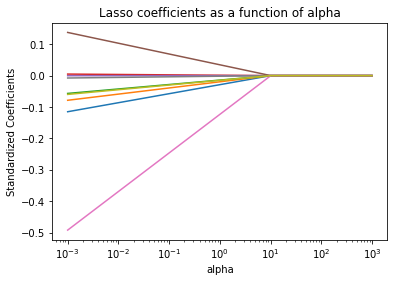

In [47]:
import matplotlib.pyplot as plt

alphas = np.linspace(0.001,1000,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [48]:
# Lasso with optimal alpha
from sklearn.linear_model import LassoCV

# Create the model
lasso_cv = LassoCV(alphas=np.logspace(-5, 5, 10), cv=5)

# Fit the model to the data
lasso_cv.fit(X_train, y_train)

# Predict the targets for the input data
predictions = lasso_cv.predict(X)

# Get the optimal value of alpha
optimal_alpha = lasso_cv.alpha_
print(optimal_alpha)

0.0016681005372000592


In [49]:
y_pred_lasso = reg.predict(X_test)
#y_pred_lasso = Extract(y_pred_lasso)
fpr, tpr, threshold = roc_curve(y_test, y_pred_lasso) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

# Building an Additive Model
Install pygam to run GAMs in Python

In [50]:
!pip install pygam
from pygam import LinearGAM, GAM, LogisticGAM, s, f, l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 


In [51]:
X.head()

Pclass       Age     SibSp     Parch      Fare  Cabin  Sex_male  \
0  0.827377 -0.494258  0.432793 -0.473674 -0.502445      0         1   
1 -1.566107  0.717299  0.432793 -0.473674  0.786845      1         0   
2  0.827377 -0.191368 -0.474545 -0.473674 -0.488854      0         0   
3 -1.566107  0.490132  0.432793 -0.473674  0.420730      1         0   
4  0.827377  0.490132 -0.474545 -0.473674 -0.486337      0         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [101]:
# Specifying treatment of the variables (spline, factor, linear, etc)
gam = LinearGAM(s(0,n_splines=6)+f(1)+l(2)+s(3,n_splines=6)+f(4)+s(5,n_splines=6)+s(6,n_splines=6)+s(7,n_splines=6)+s(8,n_splines=6)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     117.453
Link Function:                     IdentityLink Log Likelihood:                                 -1922.5336
Number of Samples:                          891 AIC:                                             4081.9732
                                                AICc:                                            4118.6516
                                                GCV:                                                0.1742
                                                Scale:                                              0.1335
                                                Pseudo R-Squared:                                   0.5101
Feature Function                  Lam

<ipython-input-101-2089e492f1e6>:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [102]:
# Remember we dummified the "education" variable into four indicators
plt.rcParams['figure.figsize'] = (20, 4)
fig, axs = plt.subplots(1, 8)
titles = list(X.columns)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), c='g')
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='k', ls='--')
plt.show()

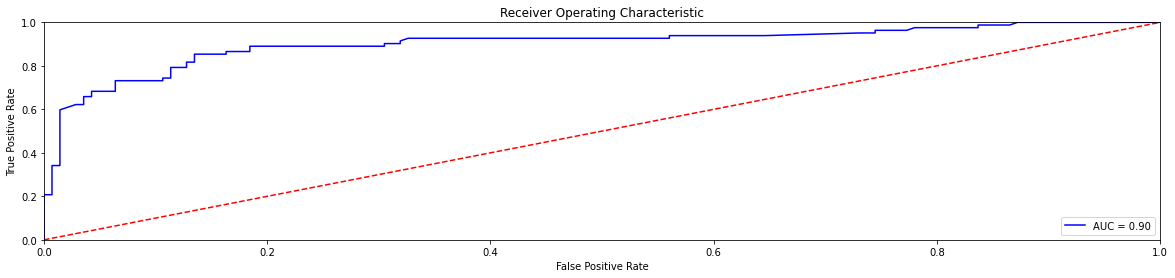

In [103]:
y_pred_gam = gam.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_gam) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

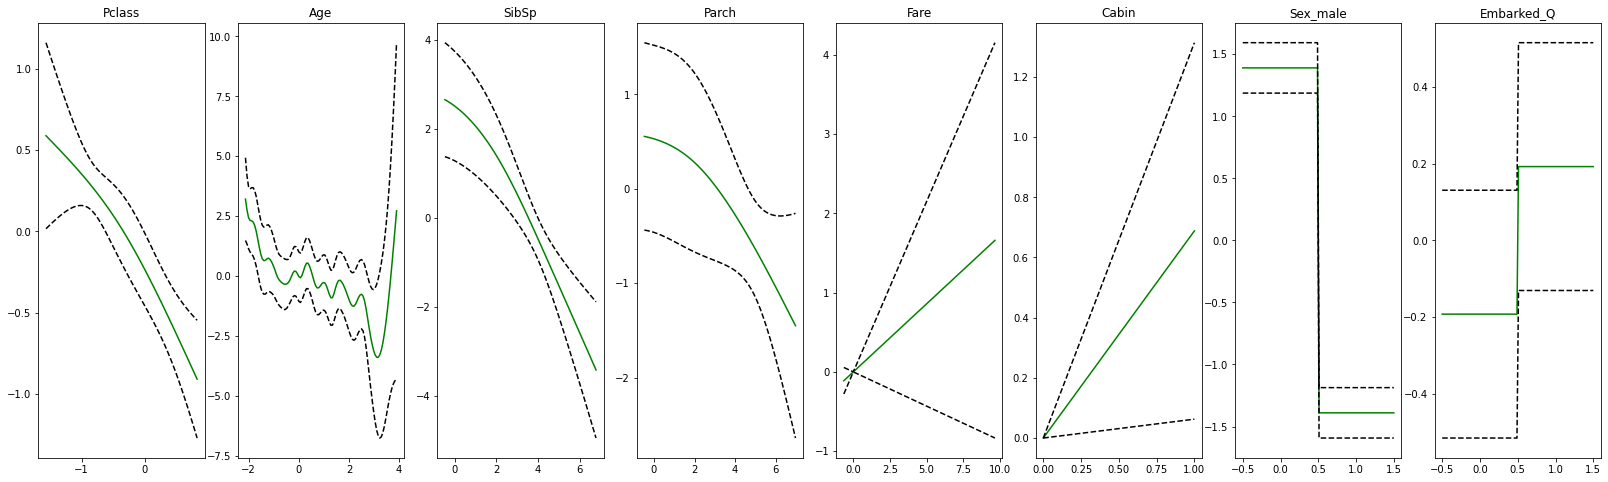

In [100]:
# Let's also do a logistic GAM
# Here we can control the hyper-parameters n_splines for splines and lambdas for the penalty
gam5 = LogisticGAM(s(0, n_splines=50)+s(1, n_splines=50)+s(2,n_splines=6)+s(3,n_splines=6)+l(4)+l(5)+f(6)+f(7), lam=0.6).fit(X, Y.values.astype(int))
# gam5.summary()
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, 8)
titles = list(X.columns)
for i, ax in enumerate(axs):
    XX = gam5.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam5.partial_dependence(term=i, X=XX), c='g')
    ax.plot(XX[:, i], gam5.partial_dependence(term=i, X=XX, width=.95)[1], c='k', ls='--')
    ax.set_title(titles[i]);
plt.show()


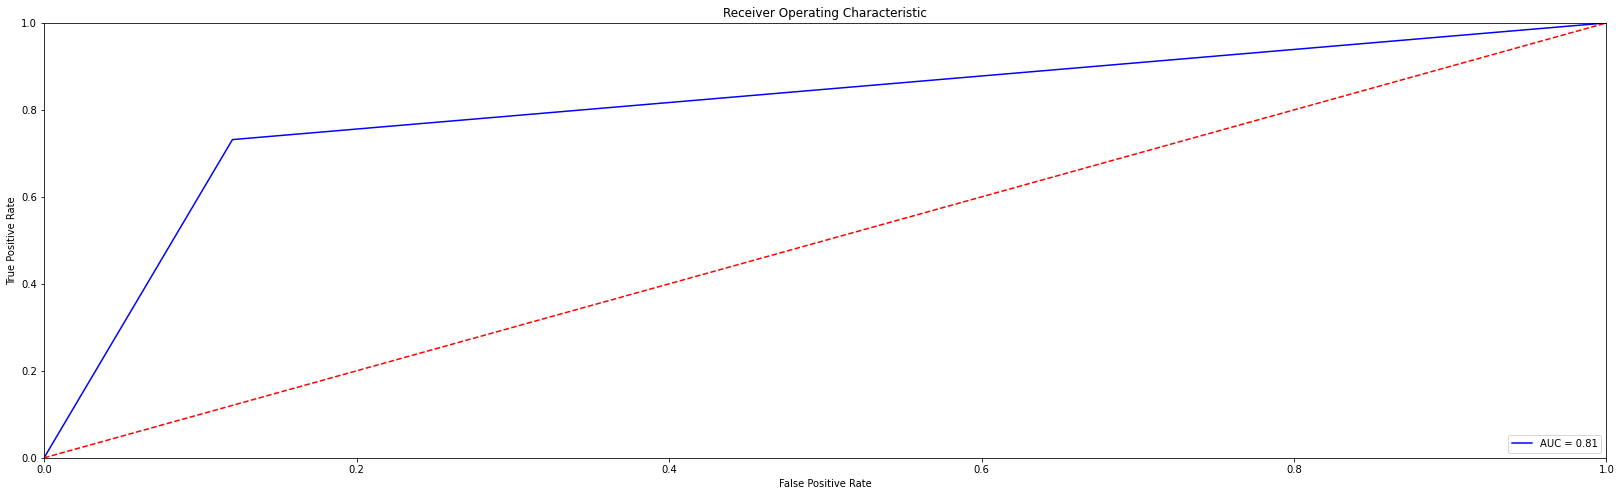

In [87]:
y_pred_gam5 = gam5.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_gam5) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

Average Lasso Logistic and Gam model.

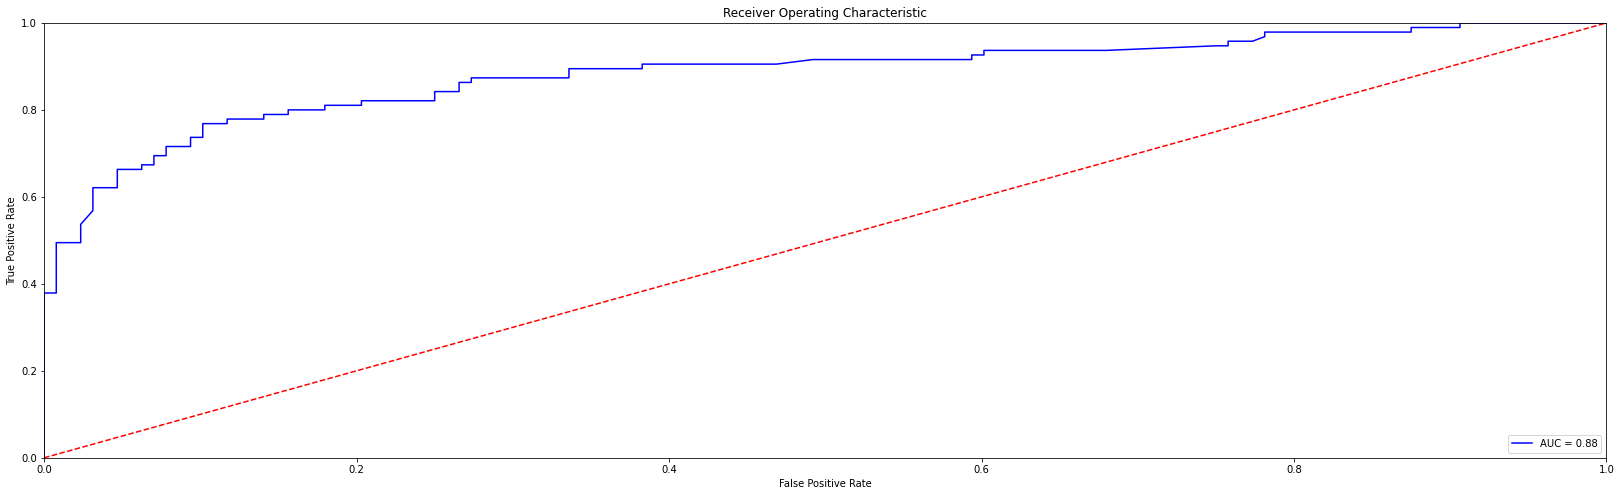

In [57]:
model_additive_ens = [(x) + (1-y) for x, y in zip(y_pred_gam, y_pred_lassologcv)]
fpr, tpr, threshold = roc_curve(y_test, model_additive_ens) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

# Tree

In [58]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
import graphviz
import pydot
from io import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

In [59]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [61]:
model_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.002)
model_tree.fit(X_train, y_train)
graph, = print_tree(model_tree, features= X_train.columns)
Image(graph.create_png())

In [62]:
model_tree_preds = model_tree.predict(X_test.values)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


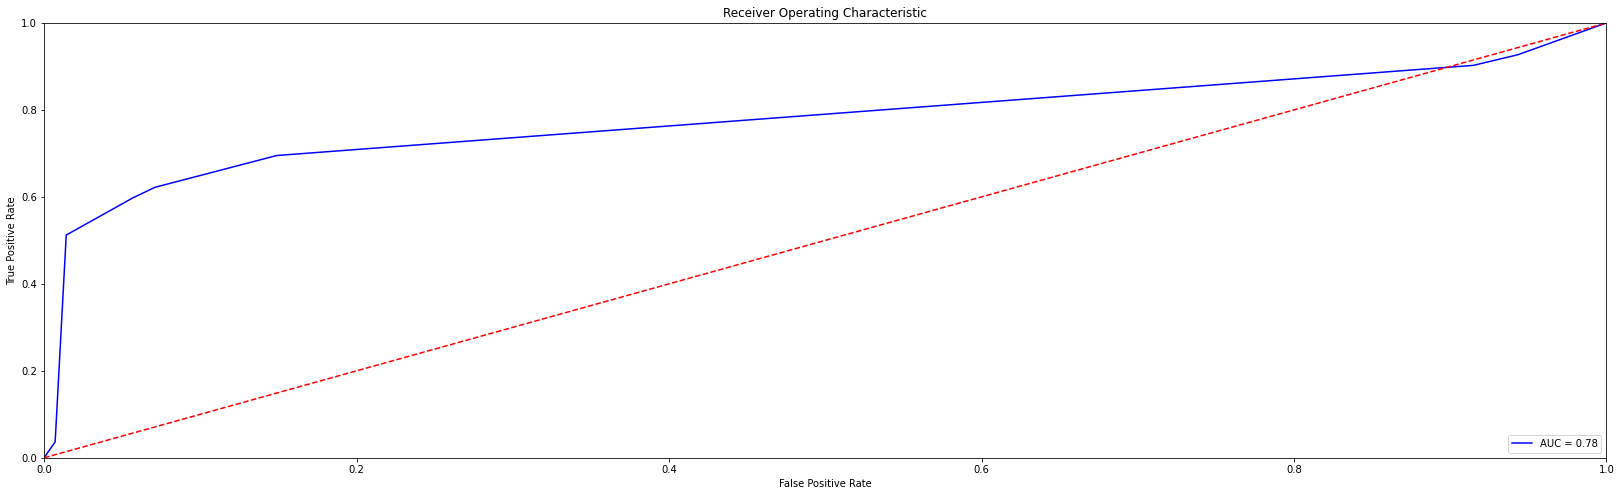

In [63]:
fpr, tpr, threshold = roc_curve(y_test, model_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

In [64]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc
model_rf = RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=1)

In [65]:
model_rf_preds = model_rf.predict_proba(X_test)

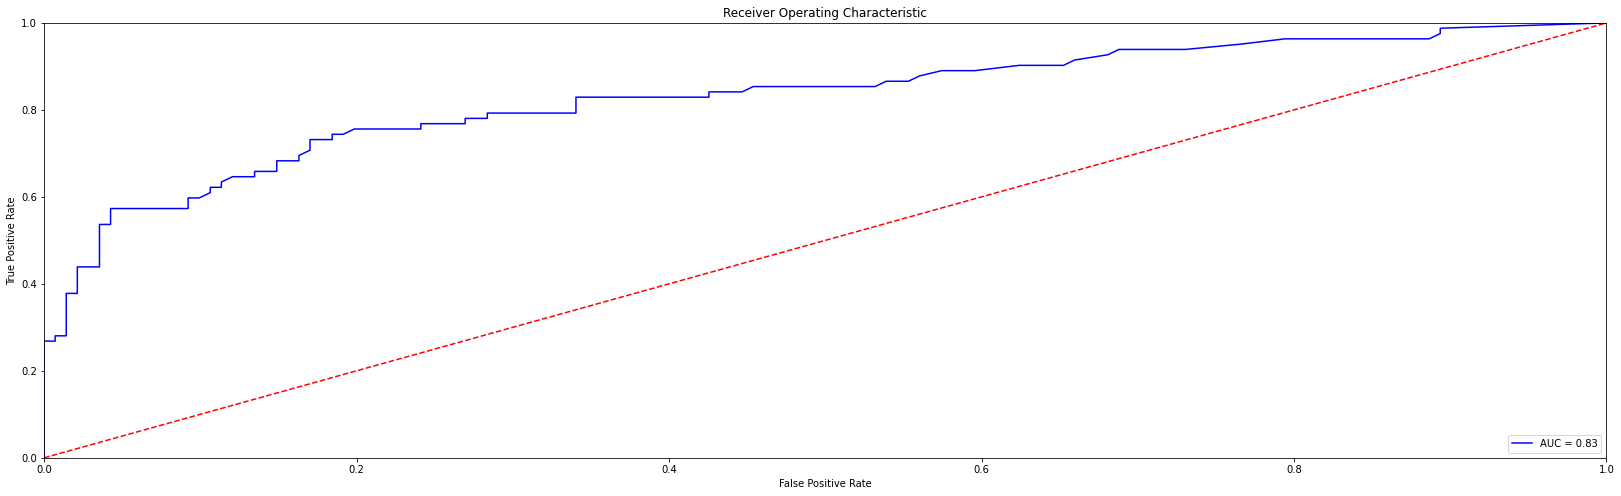

In [66]:
fpr, tpr, threshold = roc_curve(y_test, model_rf_preds[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
confusion_matrix(y_test, (model_rf_preds[:,1] > 0.5))

array([[123,  18],
       [ 29,  53]])

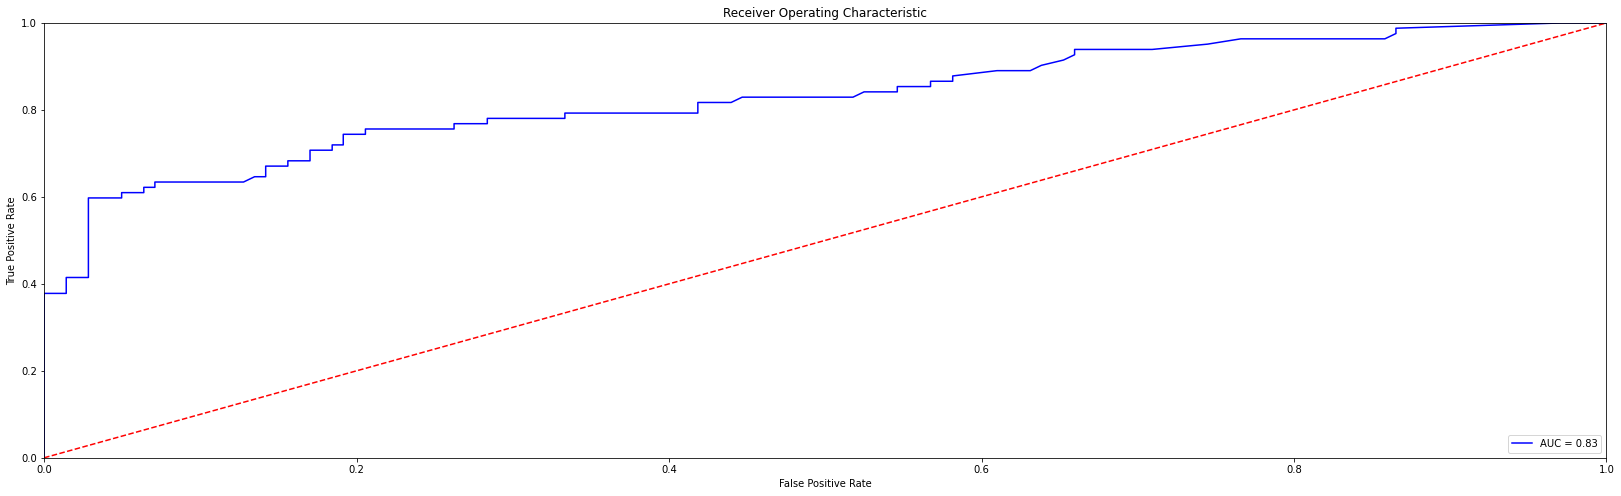

In [68]:
model_forest_ens = [(x) + (y) for x, y in zip(model_tree_preds, model_rf_preds[:,1])]
fpr, tpr, threshold = roc_curve(y_test, model_forest_ens ) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

# Boosting

In [69]:
model_boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05,random_state=1)
model_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,
                           random_state=1)

In [70]:
model_boost_preds = model_boost.predict_proba(X_test)

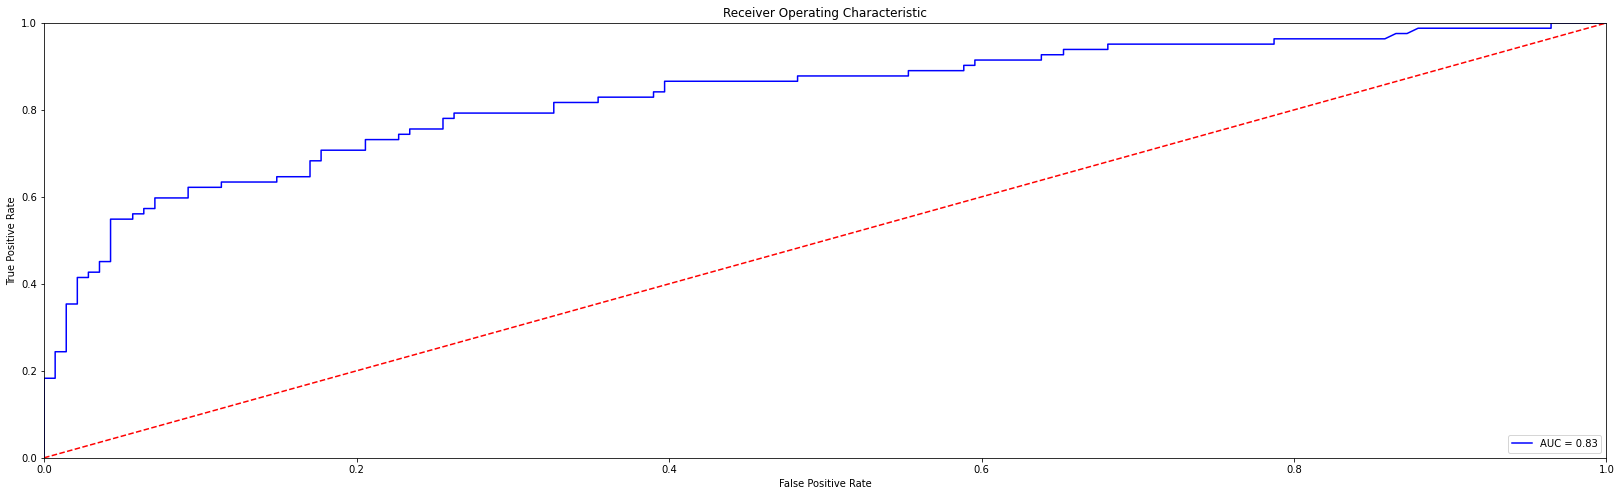

In [71]:
fpr, tpr, threshold = roc_curve(y_test, model_boost_preds[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
confusion_matrix(y_test, (model_boost_preds[:,1] > 0.5))

array([[120,  21],
       [ 30,  52]])

# Ensemble of Tree, Random Forest, and Boosting Model

In [73]:
model_boost_ens = ( model_tree_preds + model_rf_preds[:,1] + model_boost_preds[:,1] )/3

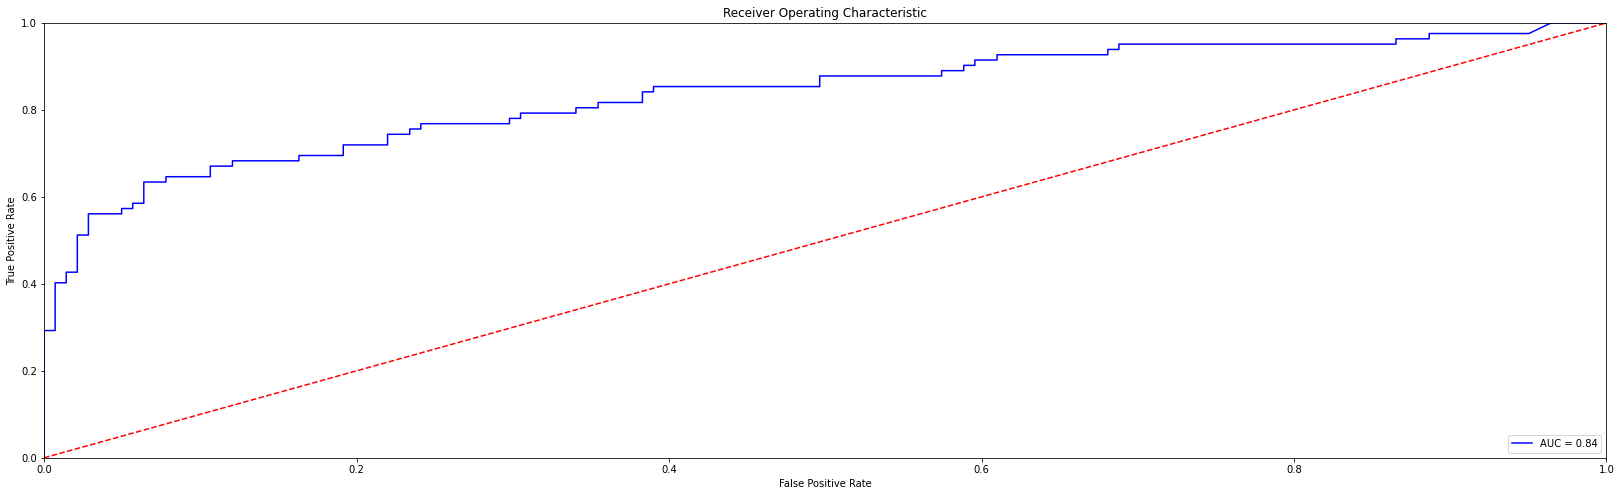

In [74]:
fpr, tpr, threshold = roc_curve(y_test, model_boost_ens)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
confusion_matrix(y_test, (model_boost_ens > 0.5))

array([[127,  14],
       [ 29,  53]])

# Neural Nets

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(9,))
x = layers.Dense(2, activation="sigmoid", name="dense_1")(inputs)
x = layers.Dense(3, activation="relu", name="dense_2")(x)
x = layers.Dense(4, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
model_nnet = keras.Model(inputs=inputs, outputs=outputs)
model_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [77]:
history = model_nnet.fit(
  X_train,
  y_train,
  batch_size=10,
  epochs=500
)

Epoch 1/500
45/45 [==============================] - 2s 7ms/step - loss: 0.7040 - accuracy: 0.5191
Epoch 2/500
45/45 [==============================] - 0s 9ms/step - loss: 0.6235 - accuracy: 0.6427
Epoch 3/500
45/45 [==============================] - 0s 8ms/step - loss: 0.5953 - accuracy: 0.6697
Epoch 4/500
45/45 [==============================] - 0s 9ms/step - loss: 0.5586 - accuracy: 0.7416
Epoch 5/500
45/45 [==============================] - 0s 7ms/step - loss: 0.5165 - accuracy: 0.8022
Epoch 6/500
45/45 [==============================] - 0s 4ms/step - loss: 0.4820 - accuracy: 0.7978
Epoch 7/500
45/45 [==============================] - 0s 5ms/step - loss: 0.4543 - accuracy: 0.8135
Epoch 8/500
45/45 [==============================] - 0s 6ms/step - loss: 0.4443 - accuracy: 0.8202
Epoch 9/500
45/45 [==============================] - 0s 6ms/step - loss: 0.4323 - accuracy: 0.8202
Epoch 10/500
45/45 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.8270
Epoch 11/

In [78]:
model_nnet_val_preds = model_nnet.predict(X_val)

7/7 [==============================] - 0s 2ms/step


In [79]:
fpr, tpr, threshold = roc_curve(y_val, model_nnet_val_preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.804617756857653

7/7 [==============================] - 0s 2ms/step


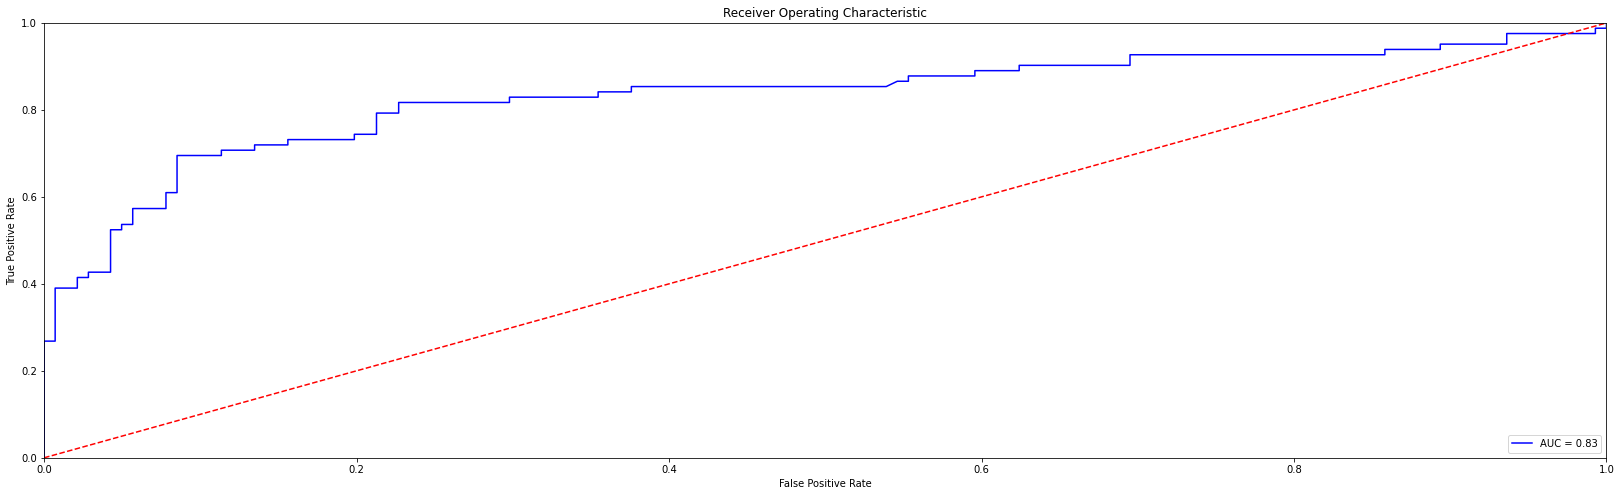

In [80]:
model_nnet_preds = model_nnet.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, model_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
model_all_ens = [(x) + (y) for x, y in zip(model_boost_ens, model_nnet_preds)]
model_all_ens = [(x) + (y) for x, y in zip(model_all_ens, model_additive_ens)]
model_all_ens = [(x) + (y) for x, y in zip(model_all_ens, model_class_ens)]

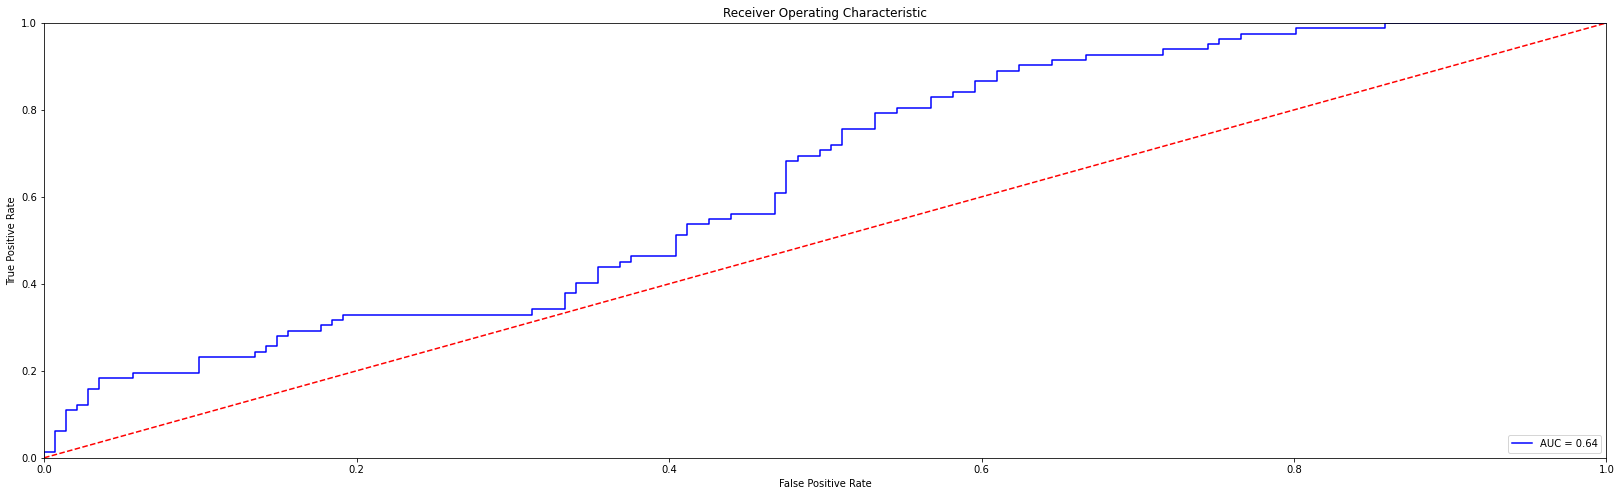

In [82]:
fpr, tpr, threshold = roc_curve(y_test, model_all_ens) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

# Final

In [106]:
y_pred_final = gam.predict(test)
y_pred_final = [1 if x > 0.70 else 0 for x in y_pred_final]

In [107]:
output = pd.DataFrame({'PassengerId': PID, 'Survived': y_pred_final})
output.to_csv('/content/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [98]:
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
